### Instructions

- In order to run this notebook, you should have already run the notebook "Data_loader" which consists of simulating and saving realisations of the function f_n and the brownian motion B_t which are defined in the file "helper.py"

In [1]:
import numpy as np
import ot #package for optimal transport solver
import matplotlib.pyplot as plt
from helper import *

### Loading the data

In [2]:
#loading the brownian bridges simulations
B_array_100=np.loadtxt("DATA/B_array_100.csv", delimiter=",", dtype=float)
B_array_500=np.loadtxt("DATA/B_array_500.csv", delimiter=",", dtype=float)
B_array_1000=np.loadtxt("DATA/B_array_1000.csv", delimiter=",", dtype=float)

B_array=[B_array_100, B_array_500, B_array_1000]

fn_100=np.loadtxt("DATA/array_fn100.csv", delimiter=",", dtype=float)
fn_500=np.loadtxt("DATA/array_fn500.csv", delimiter=",", dtype=float)
fn_1000=np.loadtxt("DATA/array_fn1000.csv", delimiter=",", dtype=float)

fn_array=[fn_100, fn_500, fn_1000]

### Visualising the distribution of f_n for n={100, 500, 1000}

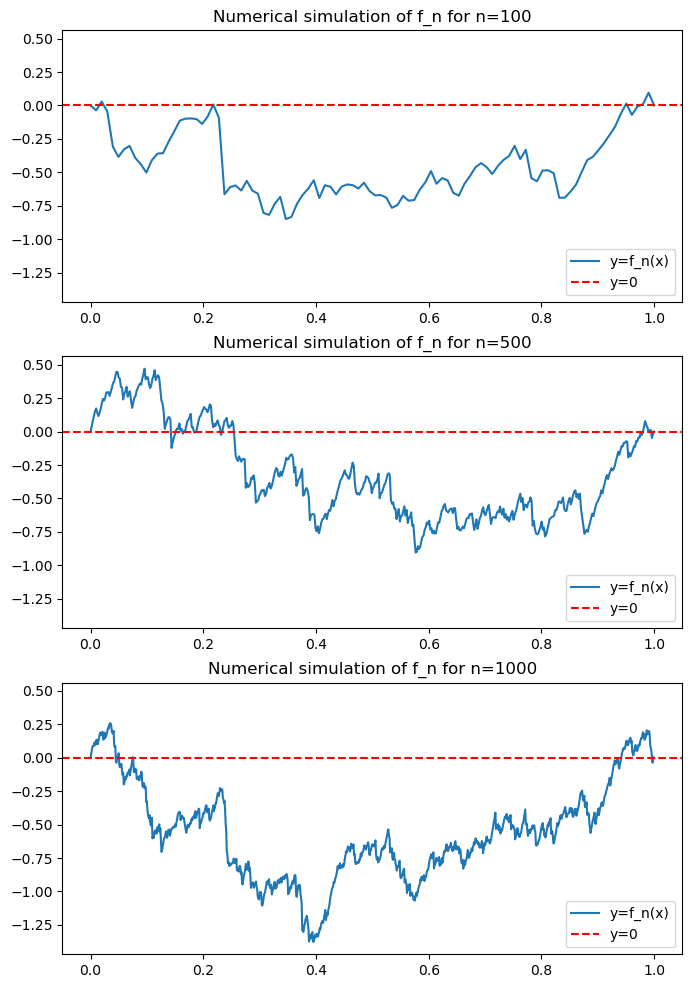

In [3]:
n=[100, 500, 1000]
fig, ax = plt.subplots(3,1,figsize= (8,12), sharey = True, sharex = False)

for i in range(3):
    sbplt = ax[i]
    z=np.linspace(0,1,n[i]+2) #list of increments
    sbplt.plot(z,fn_array[i], label="y=f_n(x)")#with pre-running
    sbplt.axhline(y=0, color='r', linestyle='--', label="y=0")
    sbplt.set_title("Numerical simulation of f_n for n=%s" % n[i])
    sbplt.legend(loc='lower right')
    
    #to save the figures separatly
    extent = sbplt.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    sbplt.figure.savefig("Figures/fn_"+str(n[i]) +".png", bbox_inches=extent.expanded(1.1, 1.21))
    

### Visualising the empirical distribution of f_n for n={100,500,1000}

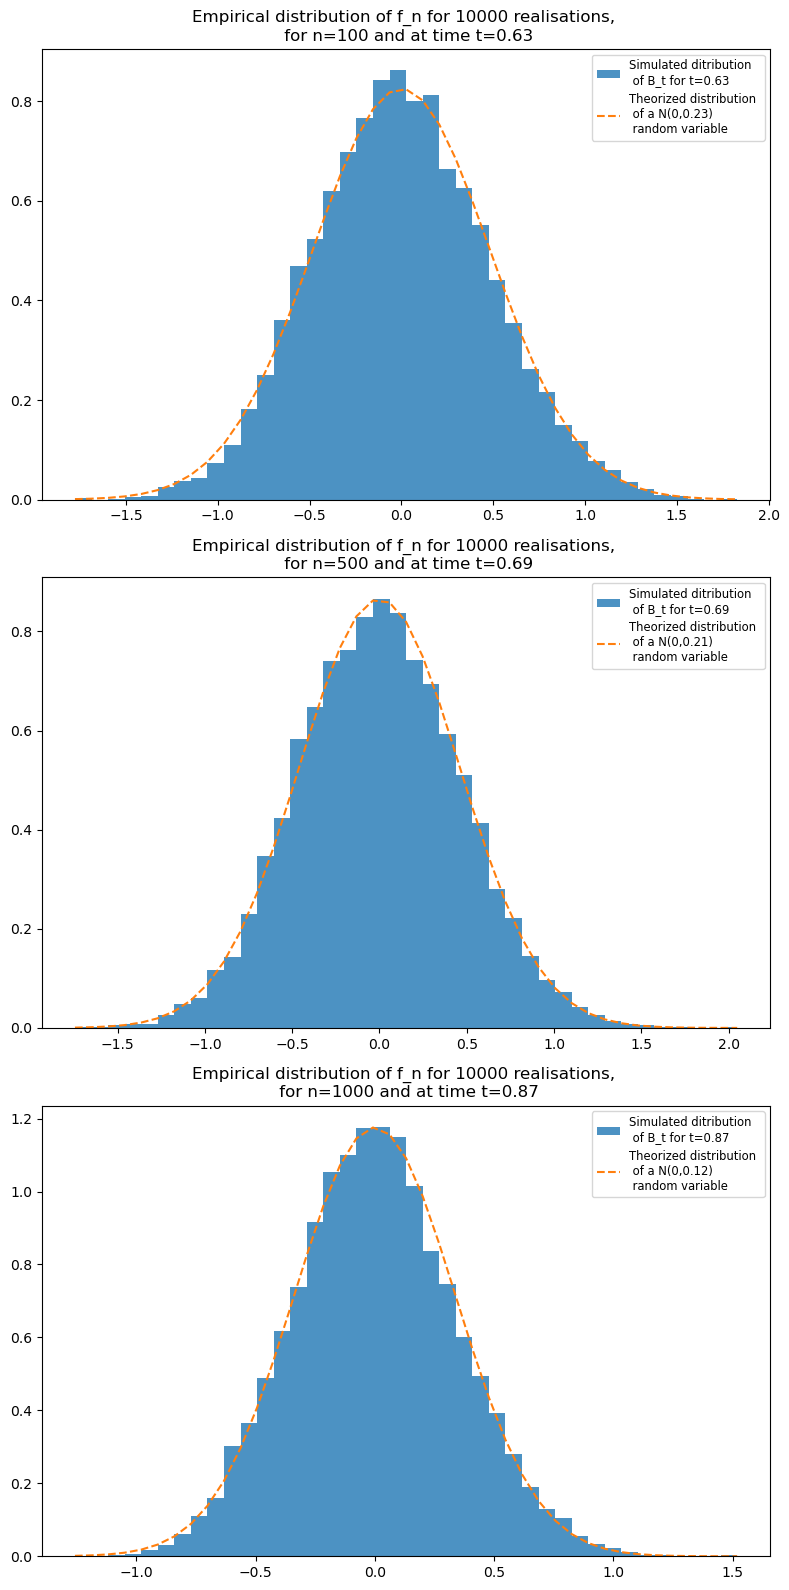

In [4]:
n=[100, 500, 1000]
np.random.seed(999) #seed for reproducibility

fig, ax = plt.subplots(3,1,figsize= (8,16), sharey = False, sharex = False)

for i in range(3):
    sbplt = ax[i]
    t=np.random.randint(0,n[i]+1)
    
    #adapting t_1 to make it belong in [0,1]
    norm_t=t/(n[i]+2)
    std=np.sqrt(norm_t*(1-norm_t))
    
    _, bins, _=sbplt.hist(B_array[i][:,t], density=True, bins=40, label="Simulated ditribution \n of B_t for t=%s" %np.round(norm_t,2) , alpha=0.8) #62 was chosen randomly in {0,...,10000}
    
    #theorized distribution of a centered normal gaussian variable with mean 0 and variance t_1(1-t_1)
    y = ((1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * (1 / std * bins)**2))
    sbplt.plot(bins, y, '--', label="Theorized distribution \n of a N(0,%s) \n random variable" %np.round(std**2,2))
    sbplt.legend(loc="upper right", fontsize="small")
    sbplt.set_title("Empirical distribution of f_n for 10000 realisations, \n for n={} and at time t={}".format(n[i], np.round(norm_t,2)))
    
    #to save the figures separatly
    extent = sbplt.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    sbplt.figure.savefig("Figures/empirical_distribution_"+str(n[i]) +".png", bbox_inches=extent.expanded(1.1, 1.25))
    
fig.tight_layout()   

plt.show()

### Visualising the empirical covariance of (f_n(t), f_n(s)) for t in [0,1] and n={100,500,1000}

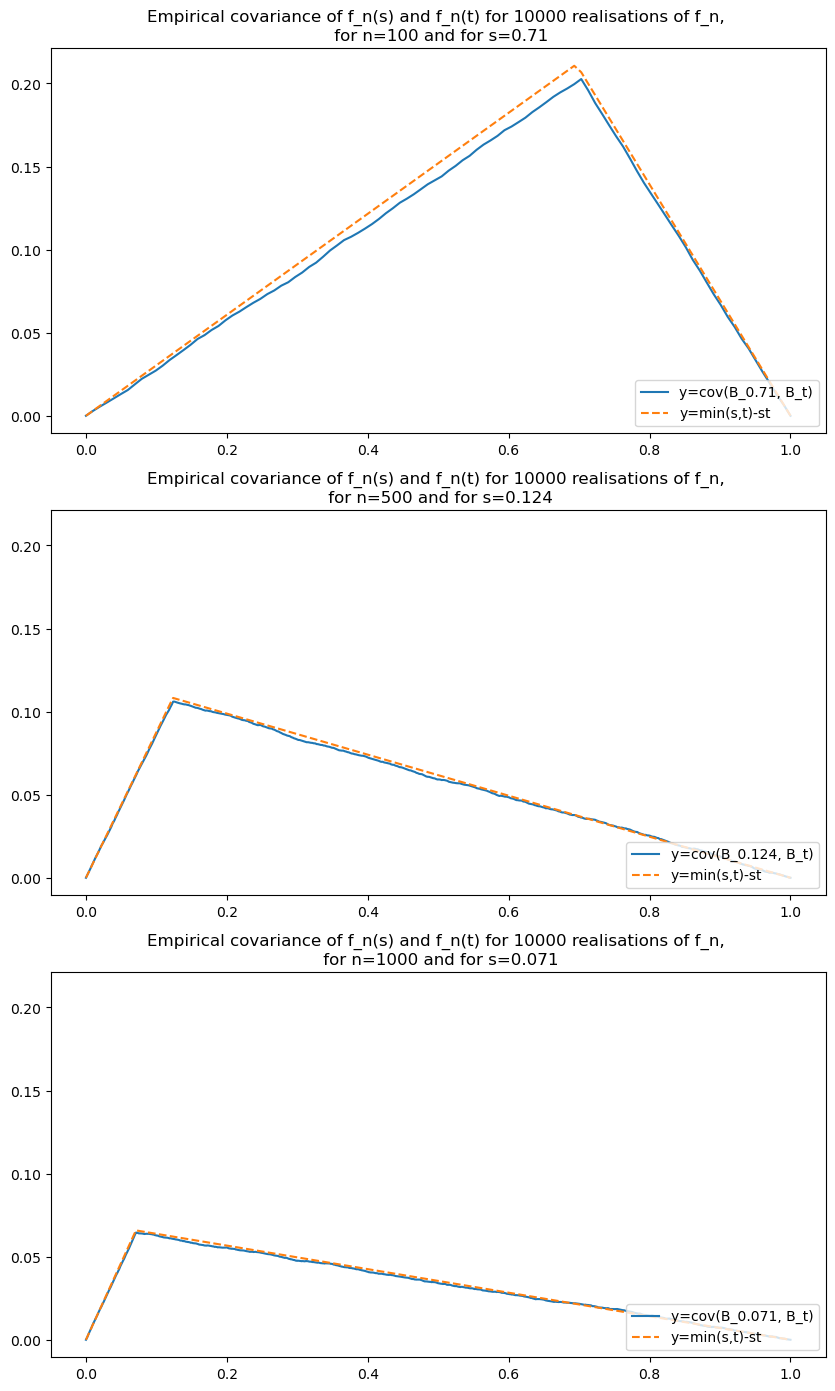

In [5]:
n=[100, 500, 1000]
np.random.seed(738)
fig, ax = plt.subplots(3,1,figsize= (10,17), sharey = True, sharex = False)

for i in range(3):
    sbplt = ax[i]
    z=np.linspace(0,1,n[i]+2) #list of increments
    s=np.random.randint(0,n[i]+1)
    
    cov_s=np.cov(B_array[i], rowvar=False)[s]#cov(B_s,B_t) for all t
    
    sbplt.plot(z,cov_s, label="y=cov(B_%s, B_t)" %(s/n[i]) )
    sbplt.plot(z, t_cov(s,n[i]), linestyle='--', label="y=min(s,t)-st")
    
    sbplt.set_title("Empirical covariance of f_n(s) and f_n(t) for 10000 realisations of f_n, \n for n={} and for s={}".format(n[i], (s/n[i])))
    sbplt.legend(loc='lower right')
    
    sbplt.legend(loc='lower right')
    
    #to save the figures separatly
    extent = sbplt.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    
    sbplt.figure.savefig("Figures/empirical_covariance_"+str(n[i]) +".png", bbox_inches=extent.expanded(1.1, 1.25))


### Visualising the empirical variance of f_n(t) for t in [0,1] and n={100,500,1000}

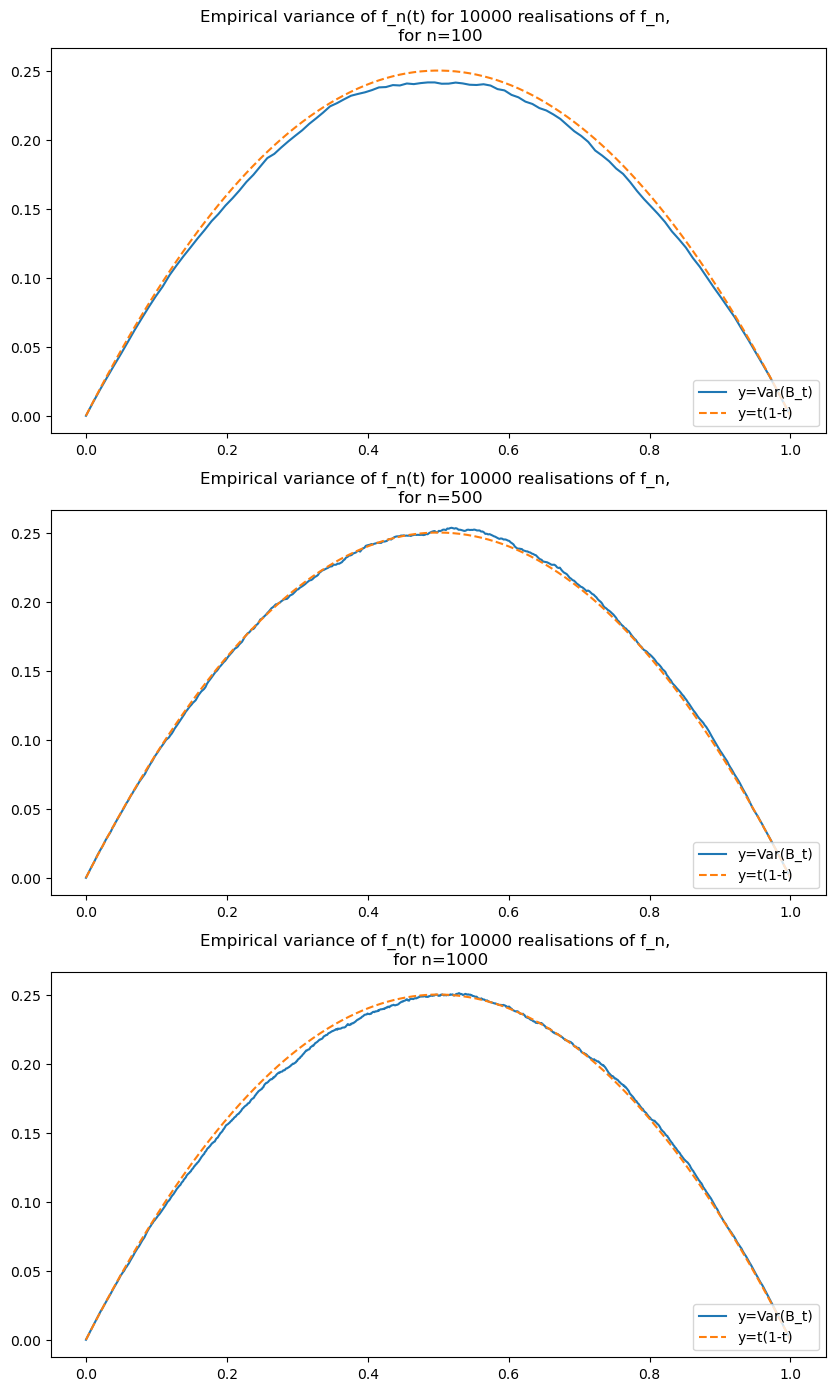

In [6]:
n=[100, 500, 1000]
np.random.seed(738)
fig, ax = plt.subplots(3,1,figsize= (10,17), sharey = True, sharex = False)

for i in range(3):
    sbplt = ax[i]
    z=np.linspace(0,1,n[i]+2) #list of increments
    
    var=np.var(B_array[i], axis=0)
    t_var=[t*(1-t) for t in z] #theoretical variance
    
    sbplt.plot(z,var, label="y=Var(B_t)" )
    sbplt.plot(z, t_var, linestyle='--', label="y=t(1-t)")
    
    sbplt.set_title("Empirical variance of f_n(t) for 10000 realisations of f_n, \n for n={}".format(n[i]) )
    sbplt.legend(loc='lower right')
    
    sbplt.legend(loc='lower right')
    
    #to save the figures separatly
    extent = sbplt.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    
    sbplt.figure.savefig("Figures/empirical_variance_"+str(n[i]) +".png", bbox_inches=extent.expanded(1.1, 1.25))
